In [ ]:
!pip install torch==2.4.0
!pip install pyg-lib -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install ogb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from ogb.nodeproppred import PygNodePropPredDataset
import torch

In [ ]:
dataset = PygNodePropPredDataset(name = 'ogbn-products')

This will download 1.38GB. Will you proceed? (y/N)
y


Downloaded 1.38 GB: 100%|██████████| 1414/1414 [00:41<00:00, 34.23it/s]


Extracting dataset/products.zip


Processing...


Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 75.27it/s]


Saving...


Done!
/usr/local/lib/python3.10/dist-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.proc

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Shared_OGBN_Data


ogbn-products.pt


In [ ]:

save_path = '/content/drive/MyDrive/Shared_OGBN_Data/ogbn-products.pt'
torch.save(dataset, save_path)


In [ ]:

#load_path = '/content/drive/MyDrive/Shared_OGBN_Data/ogbn-products.pt'
#dataset = torch.load(load_path)
#print(dataset)
split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph = dataset[0] # pyg graph object


In [ ]:
print('====================')
print(f'Number of graphs: {len(dataset)}')
print('=============================================================')
data = dataset[0]  # Get one data point.

print('Some properties of a graph in the dataset:')

print(data)
# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of node features: {data.num_node_features}')

Number of graphs: 1
Some properties of a graph in the dataset:
Data(num_nodes=2449029, edge_index=[2, 123718280], x=[2449029, 100], y=[2449029, 1])
Number of nodes: 2449029
Number of edges: 123718280
Average node degree: 50.52
Number of node features: 100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric
from torch_geometric.loader import DataLoader
import torch_geometric.utils as utils
import networkx as nx
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import global_mean_pool, global_add_pool, GraphConv, GATConv, GCNConv, GINConv, SAGEConv
import torch.nn.functional as F

In [ ]:
from torch_geometric.loader import NeighborLoader

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
data = dataset[0] # pyg graph object

#Prepare loaders

#[15, 10, 5],
train_loader = NeighborLoader(
    data,
    input_nodes=split_idx['train'],
    num_neighbors=[5],
    batch_size=1000,
    shuffle=True)

#[-1],
validation_loader = NeighborLoader(
    data,
    input_nodes = split_idx['valid'],
    num_neighbors =[10],
    batch_size = 128)

#[-1],
test_loader = NeighborLoader(
    data,
    input_nodes = split_idx['valid'],
    num_neighbors =[10],
    batch_size = 128)


KeyboardInterrupt: 

In [ ]:
for batch in train_loader:
    edge_index=batch.edge_index.numpy()
    feature=batch.x.numpy()
    print(edge_index.shape)
    print(feature.shape)
    print(len(batch.y[:batch.batch_size].squeeze()))
    break

(2, 4991)
(5942, 100)
1000


In [ ]:
# IMPORTS ######################
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
from sklearn.manifold import TSNE
from torch_geometric.nn import GCNConv, GraphSAGE
 ###############################

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


OTHER STUFF

<ipython-input-12-40597c6b94dc>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', len(unique_labels))


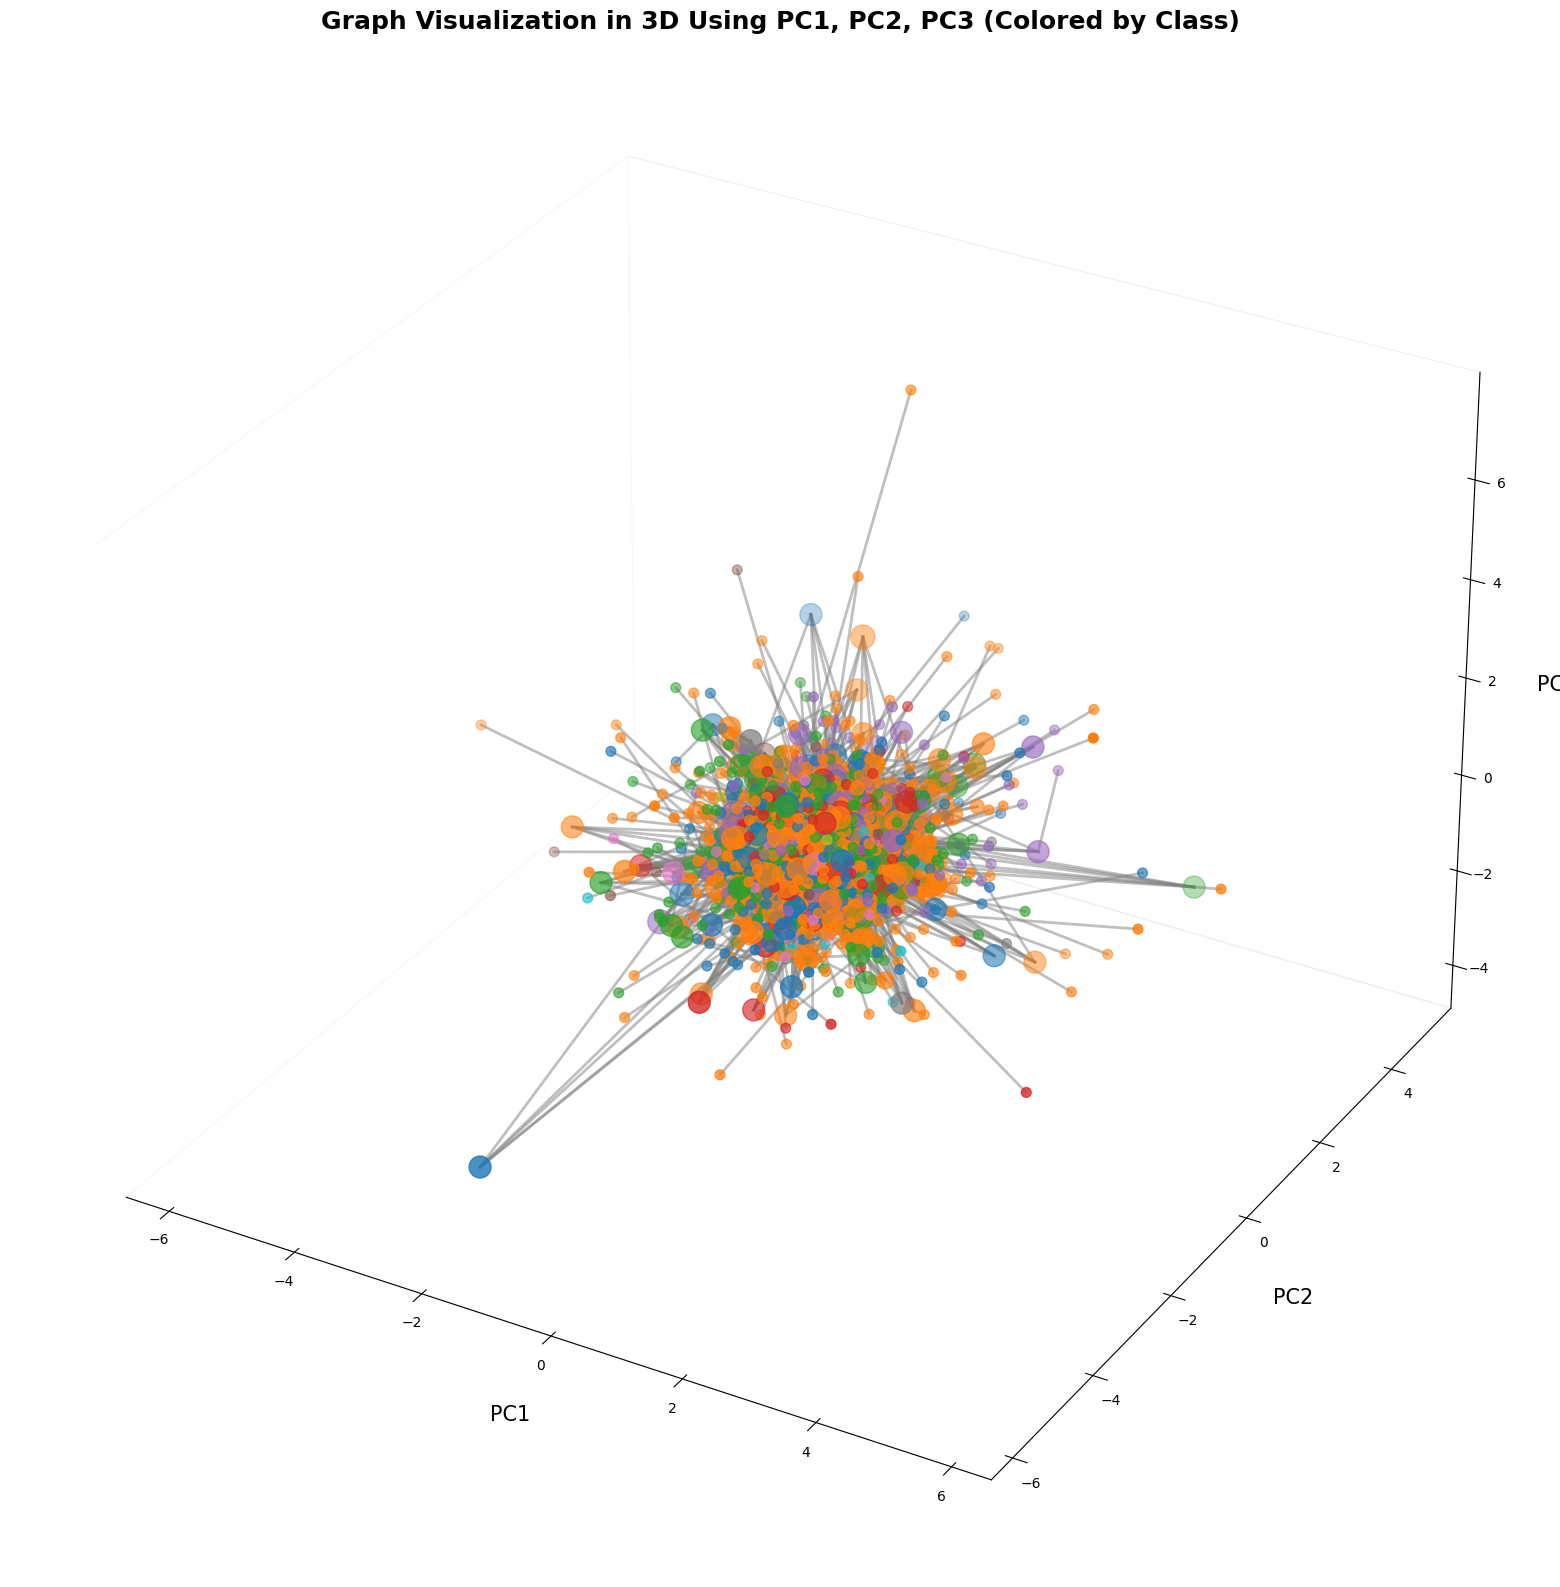

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


def get_color_map(labels):
    unique_labels = np.unique(labels)
    colormap = cm.get_cmap('tab10', len(unique_labels))
    color_map = {label: colormap(i) for i, label in enumerate(unique_labels)}
    return color_map

for batch in train_loader:
    graph = batch
    g = utils.to_networkx(graph, to_undirected=True)


    positions = {}
    node_labels = {}
    x = graph.x
    y = graph.y


    for i in range(x.shape[0]):
        positions[i] = np.array([x[i, 0], x[i, 1], x[i, 2]])  # Use PC1, PC2, PC3
        node_labels[i] = np.array(y[i])  # Use y for node labels (class labels)


    color_map = get_color_map(y.flatten())
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')

    x_vals = [positions[i][0] for i in range(len(positions))]
    y_vals = [positions[i][1] for i in range(len(positions))]
    z_vals = [positions[i][2] for i in range(len(positions))]
    y_numpy = y.flatten().numpy()

    # Node colors based on their class labels
    node_colors = [color_map[y_numpy[i]] for i in range(len(positions))]

    node_degrees = {node: degree for node, degree in dict(g.degree()).items()}
    node_sizes = [node_degrees[i] * 50 for i in range(len(positions))]  # Scaling factor for node size

    # Draw nodes with varying size and color based on their class labels
    ax.scatter(x_vals, y_vals, z_vals, c=node_colors, s=node_sizes, edgecolors=None, depthshade=True)

    for edge in g.edges():
        x_edge = [positions[edge[0]][0], positions[edge[1]][0]]
        y_edge = [positions[edge[0]][1], positions[edge[1]][1]]
        z_edge = [positions[edge[0]][2], positions[edge[1]][2]]
        ax.plot(x_edge, y_edge, z_edge, color='gray', alpha=0.5, linewidth=2)


    # Customize axes to make them clean and professional
    ax.set_xlabel('PC1', fontsize=15, labelpad=20)
    ax.set_ylabel('PC2', fontsize=15, labelpad=20)
    ax.set_zlabel('PC3', fontsize=15, labelpad=20)

    ax.xaxis.pane.fill = False  # Remove background panes for cleaner look
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.grid(False)  # Disable grid for a minimalist look

    ax.set_title('Graph Visualization in 3D Using PC1, PC2, PC3 (Colored by Class)', fontsize=18, weight='bold')

    plt.show()

    break





<ipython-input-11-44dd76bc7696>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', len(unique_labels))


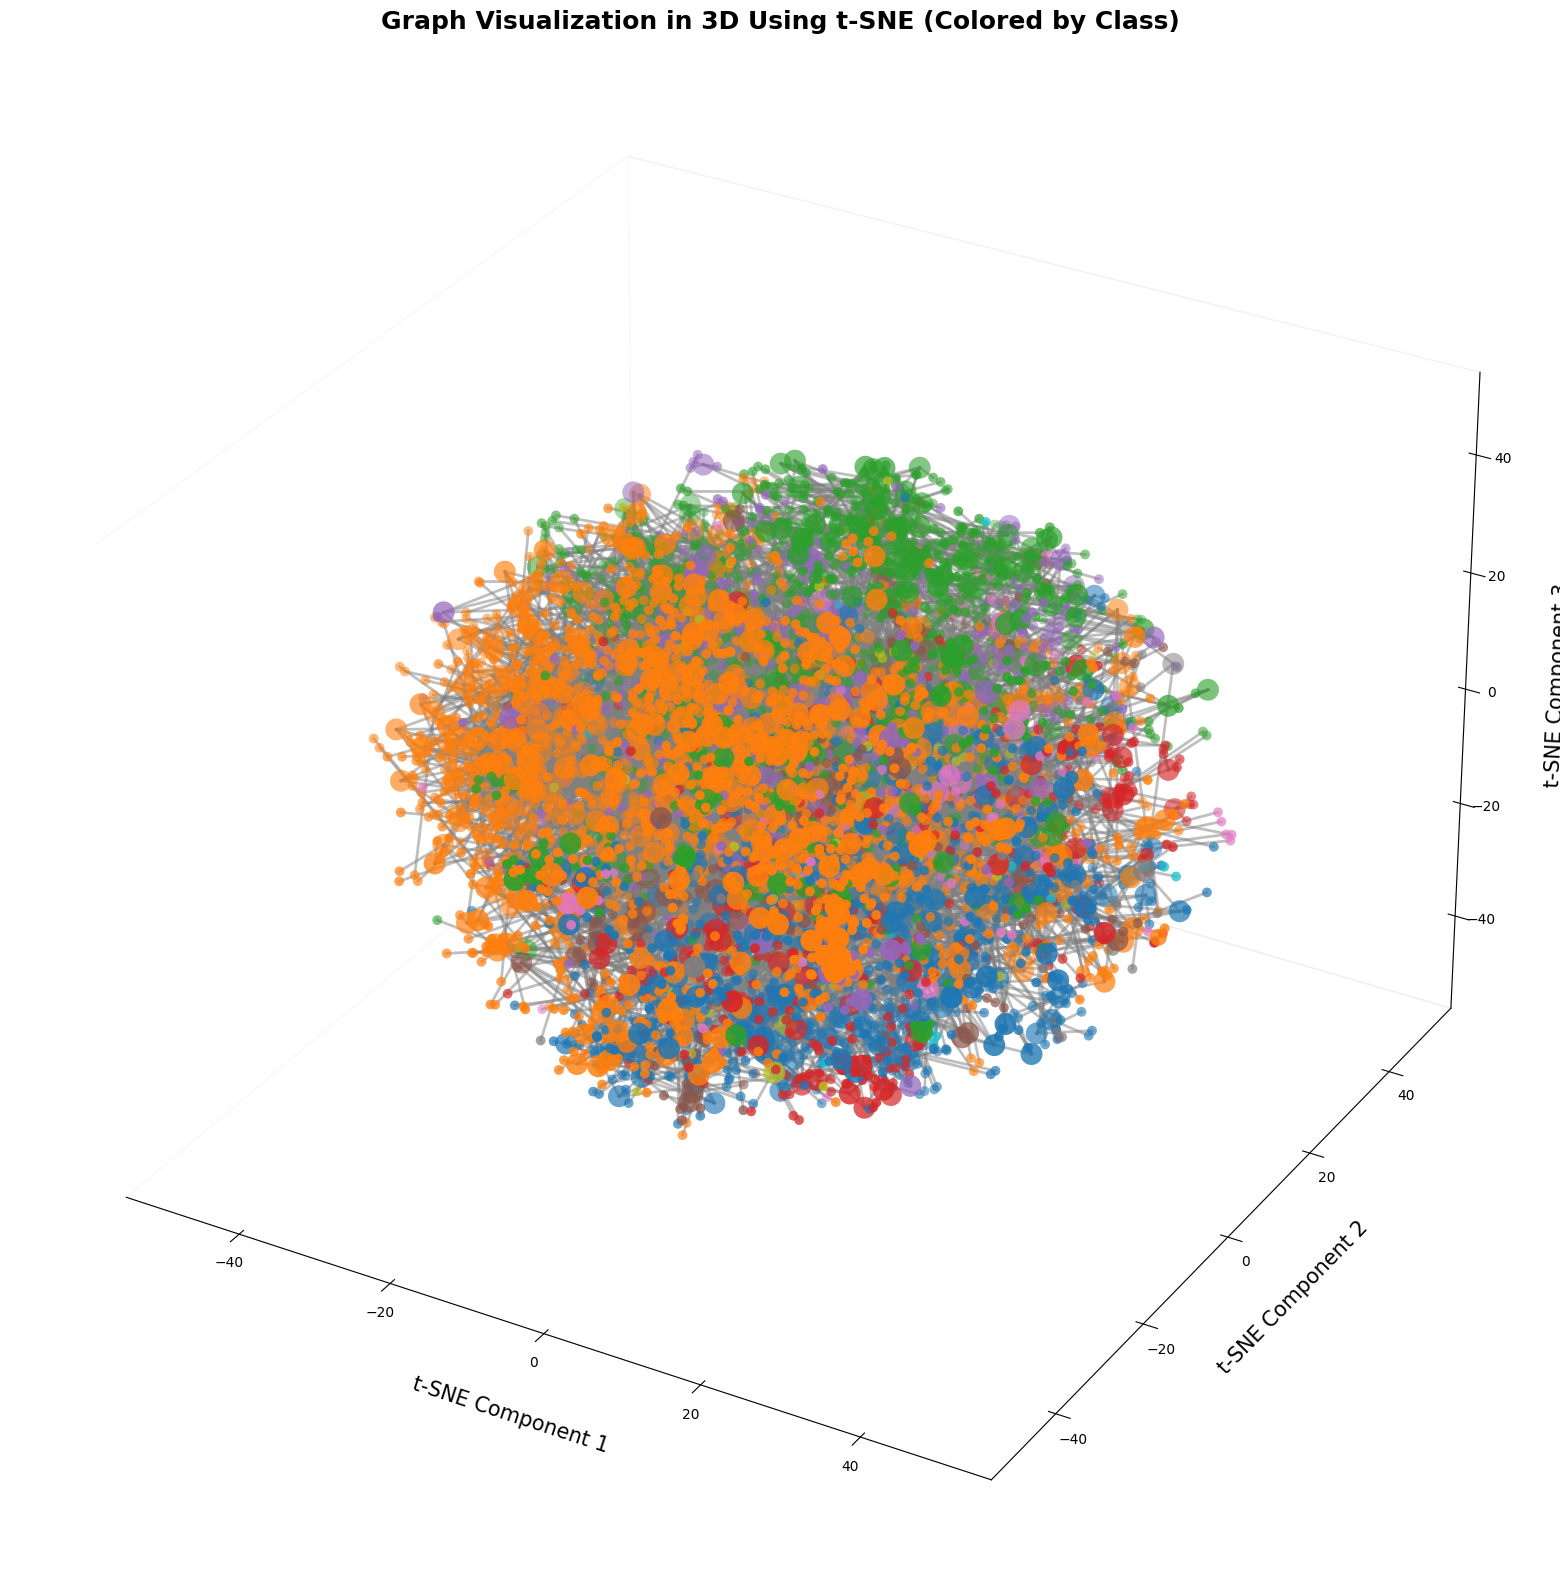

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.manifold import TSNE

# Function to get a color map based on class labels
def get_color_map(labels):
    unique_labels = np.unique(labels)
    colormap = cm.get_cmap('tab10', len(unique_labels))
    color_map = {label: colormap(i) for i, label in enumerate(unique_labels)}
    return color_map

for batch in train_loader:
    graph = batch
    g = utils.to_networkx(graph, to_undirected=True)

    x = graph.x  # Contains the 100 PCs
    y = graph.y  # Contains node labels (the class labels)

    # Flatten y tensor if necessary
    if y.ndim > 1:
        y = y.flatten()  # or y = y.squeeze() for shape (n_nodes, 1)

    # Apply t-SNE to the data (using the first 100 PCs)
    tsne = TSNE(n_components=3, random_state=42)  # Use n_components=2 for 2D, 3 for 3D
    tsne_results = tsne.fit_transform(x.numpy())  # Ensure x is a NumPy array

    # Use the t-SNE results for positions
    positions = {i: tsne_results[i] for i in range(tsne_results.shape[0])}

    # Get color map based on class labels
    color_map = get_color_map(y)

    # Set up the 3D figure
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')

    # Extract t-SNE results for plotting
    x_vals = tsne_results[:, 0]
    y_vals = tsne_results[:, 1]
    z_vals = tsne_results[:, 2]

    y_numpy = y.flatten().numpy()

    # Node colors based on their class labels
    node_colors = [color_map[y_numpy[i]] for i in range(len(positions))]

    # Calculate node sizes based on degrees (optional)
    node_degrees = {node: degree for node, degree in dict(g.degree()).items()}
    node_sizes = [node_degrees[i] * 50 for i in range(len(positions))]  # Scaling factor for node size

    # Draw nodes with varying size and color based on their class labels
    ax.scatter(x_vals, y_vals, z_vals, c=node_colors, s=node_sizes, edgecolors='none', depthshade=True)

    # Draw edges
    for edge in g.edges():
        x_edge = [positions[edge[0]][0], positions[edge[1]][0]]
        y_edge = [positions[edge[0]][1], positions[edge[1]][1]]
        z_edge = [positions[edge[0]][2], positions[edge[1]][2]]
        ax.plot(x_edge, y_edge, z_edge, color='gray', alpha=0.5, linewidth=2)


    # Customize axes for a clean look
    ax.set_xlabel('t-SNE Component 1', fontsize=15, labelpad=20)
    ax.set_ylabel('t-SNE Component 2', fontsize=15, labelpad=20)
    ax.set_zlabel('t-SNE Component 3', fontsize=15, labelpad=20)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.grid(False)

    # Add a title
    ax.set_title('Graph Visualization in 3D Using t-SNE (Colored by Class)', fontsize=18, weight='bold')

    # Display the plot
    plt.show()

    break


<ipython-input-11-44dd76bc7696>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', len(unique_labels))


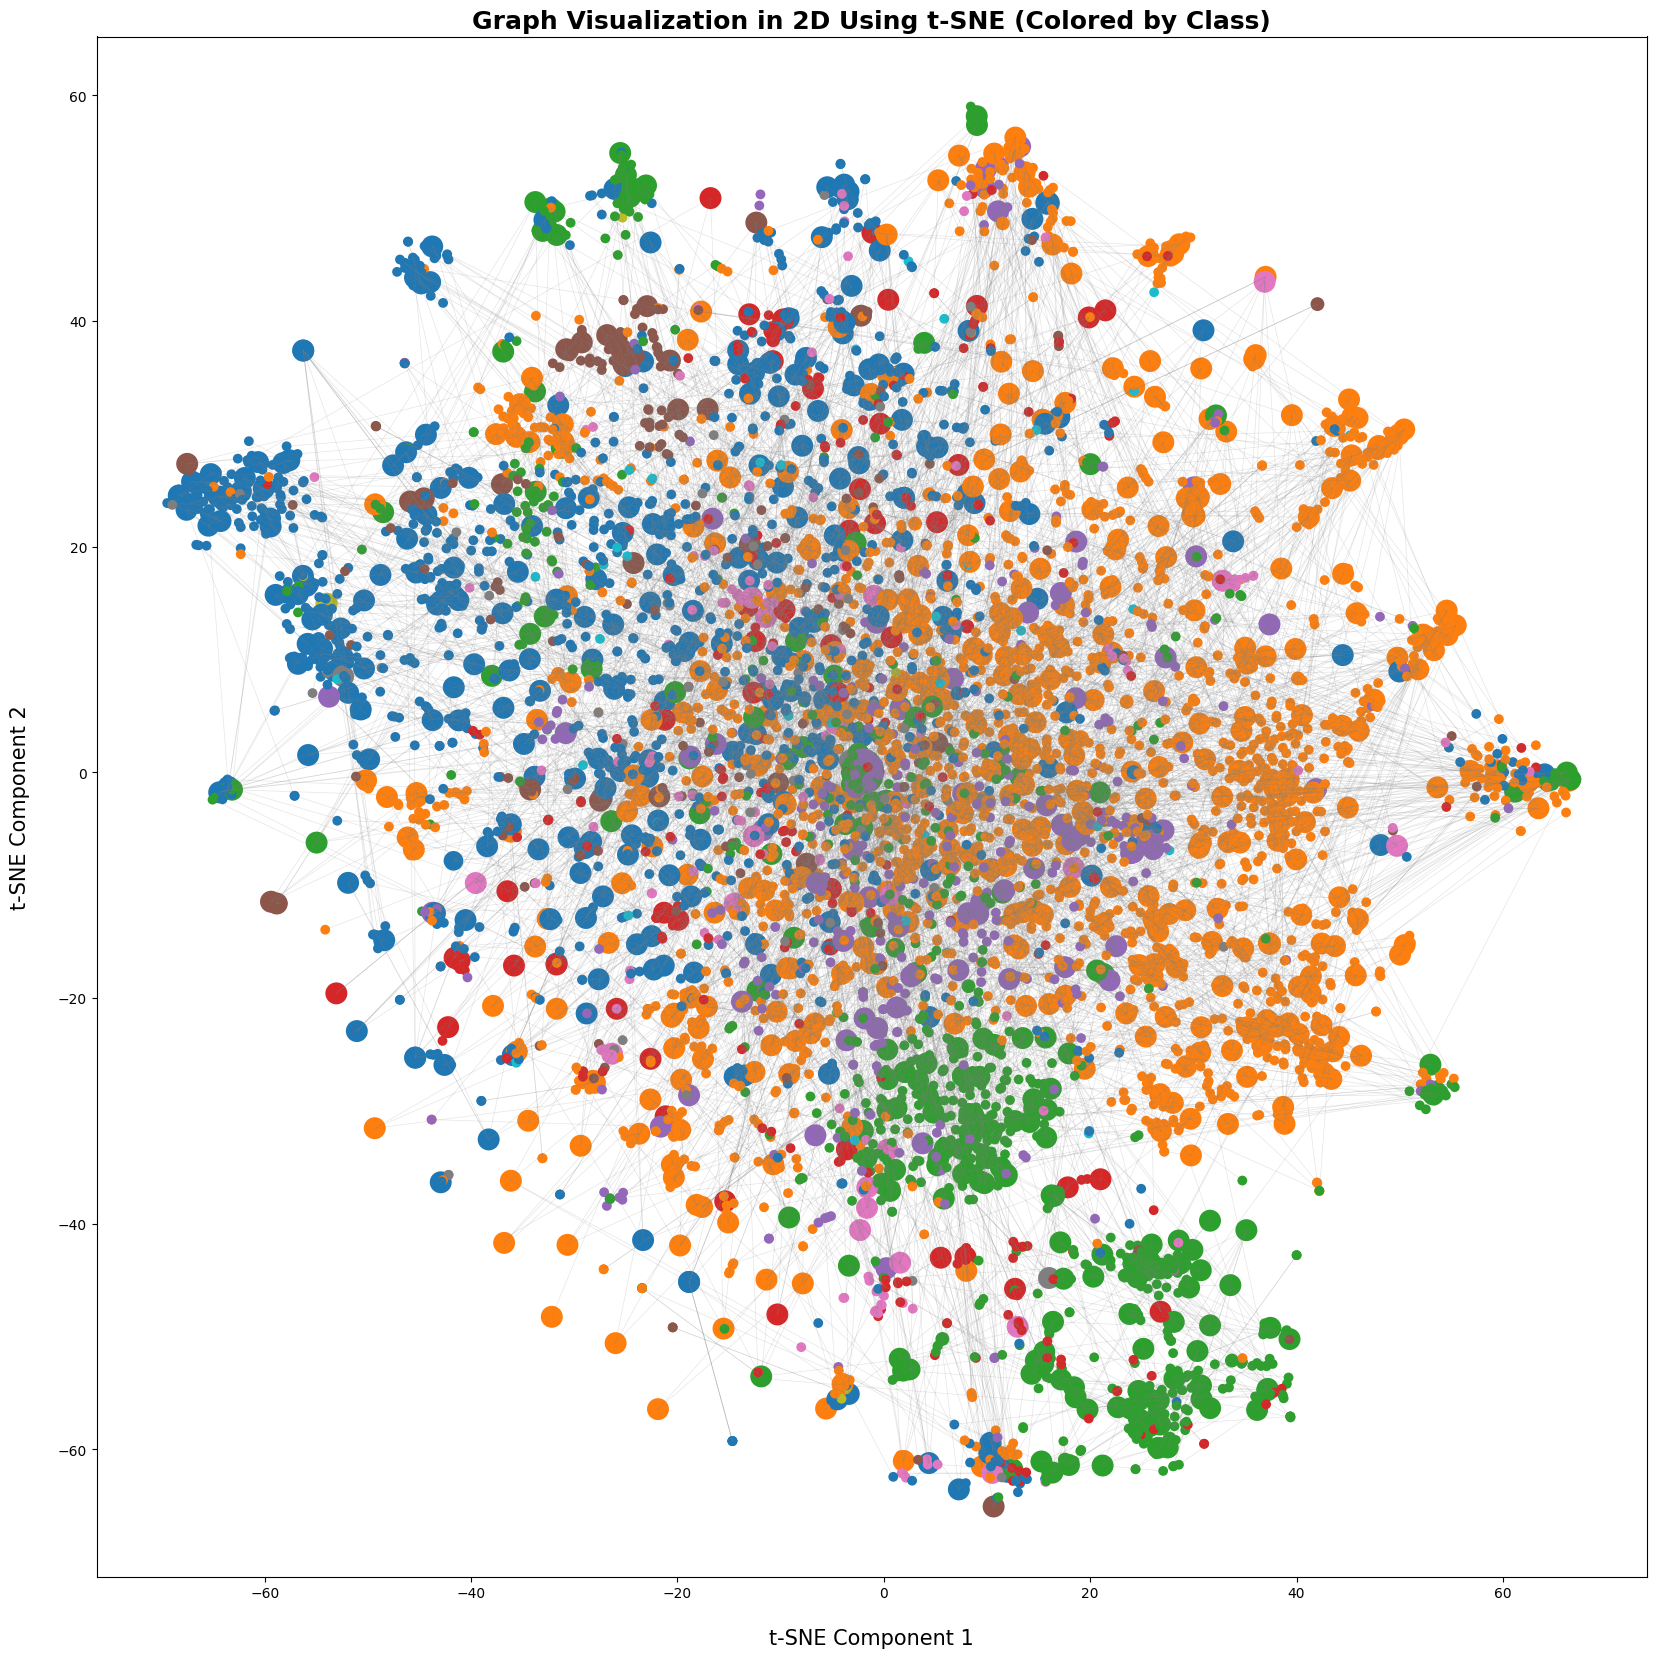

In [ ]:
for batch in train_loader:
    graph = batch
    g = utils.to_networkx(graph, to_undirected=True)

    x = graph.x
    y = graph.y

    if y.ndim > 1:
        y = y.flatten()


    tsne = TSNE(n_components=2, random_state=42) # Use n_components=2 for 2D, 3 for 3D
    tsne_results = tsne.fit_transform(x.numpy())  # Ensure x is a NumPy array

    positions = {i: tsne_results[i] for i in range(tsne_results.shape[0])}

    color_map = get_color_map(y)

    # Set up the 3D figure
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111)

    # Extract t-SNE results for plotting
    x_vals = tsne_results[:, 0]
    y_vals = tsne_results[:, 1]

    y_numpy = y.flatten().numpy()

    # Node colors based on their class labels
    node_colors = [color_map[y_numpy[i]] for i in range(len(positions))]

    # Calculate node sizes based on degrees (optional)
    node_degrees = {node: degree for node, degree in dict(g.degree()).items()}
    node_sizes = [node_degrees[i] * 50 for i in range(len(positions))]  # Scaling factor for node size
    ax.scatter(x_vals, y_vals, c=node_colors, s=node_sizes, edgecolors='none')

    for edge in g.edges():
        x_edge = [positions[edge[0]][0], positions[edge[1]][0]]
        y_edge = [positions[edge[0]][1], positions[edge[1]][1]]
        ax.plot(x_edge, y_edge, color='gray', alpha=0.2, linewidth=0.5)


    ax.set_xlabel('t-SNE Component 1', fontsize=15, labelpad=20)
    ax.set_ylabel('t-SNE Component 2', fontsize=15, labelpad=20)

    ax.grid(False)

    ax.set_title('Graph Visualization in 2D Using t-SNE (Colored by Class)', fontsize=18, weight='bold')
    plt.show()

    break

tensor([114294, 109832, 116043, 151061, 668950,  40715, 158771, 172199, 110796,
         67358,  52345,  32937, 131886, 101541,   3079,  26911,  83594,  42337,
         49019,  17438,  22575,  80795,    879,   3653,  45406,   3024,    553,
           259,   1969,   1561,    277,    418,    513,     29,    154,     44,
           630,    514,     91,     37,      6,     61,  32500,   1399,    566,
             9,      1])


Text(0.5, 1.0, 'Occurrences of Each Category')

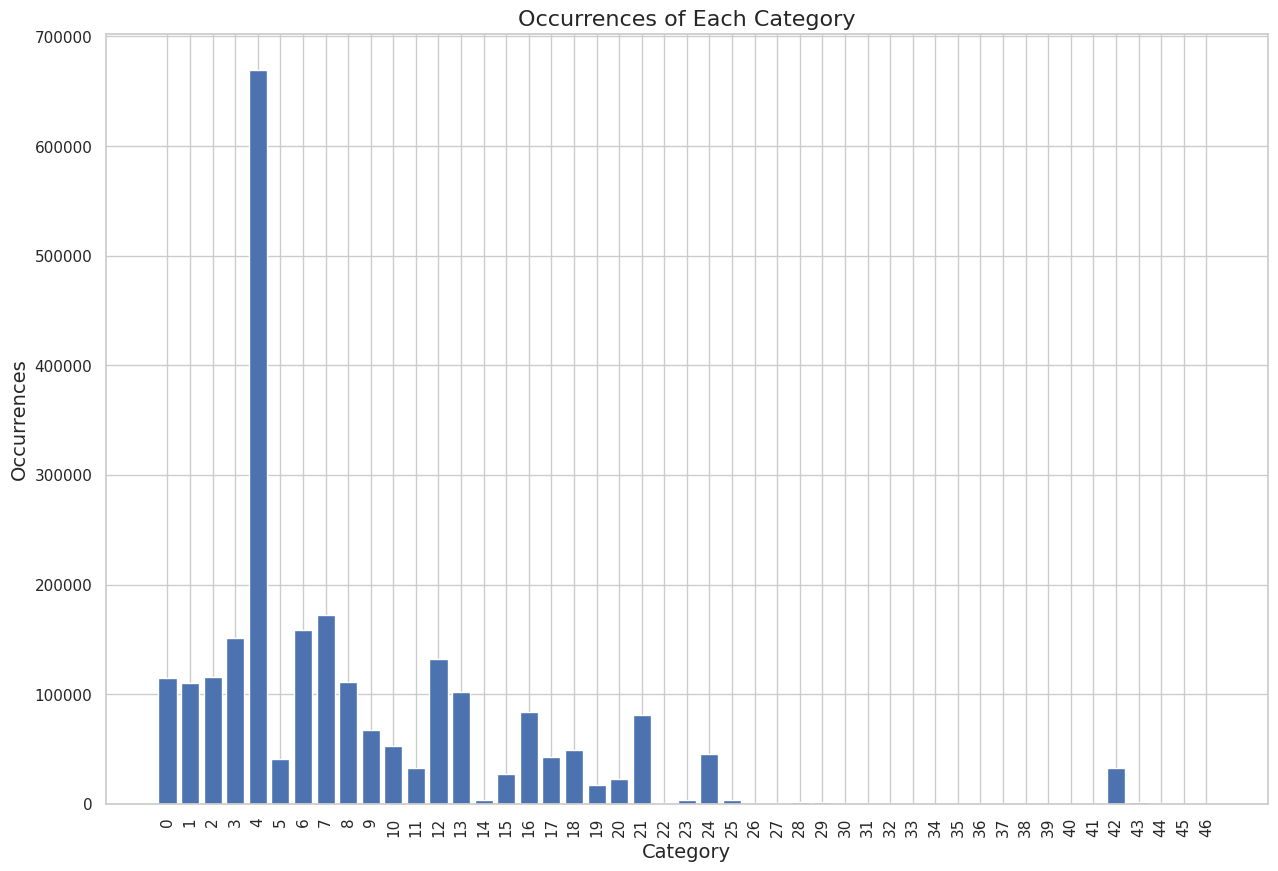

In [ ]:
# YOUR CODE HERE

cat_occurances = torch.bincount(torch.flatten(data.y))
print(cat_occurances)
number_of_categories = list(range(0, len(cat_occurances)))
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(number_of_categories, cat_occurances)
plt.xticks(number_of_categories)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Occurrences', fontsize=14)
ax.set_title('Occurrences of Each Category', fontsize=16)


[48421, 0, 102991, 0, 85363, 0, 75637, 0, 73794, 0, 70415, 0, 65539, 0, 62213, 0, 58213, 0, 54536, 0, 49739, 0, 46210, 0, 42814, 0, 39789, 0, 37742, 0, 35126, 0, 33387, 0, 31560, 0, 30077, 0, 29131, 0, 27531, 0, 26263, 0, 25528, 0, 24776, 0, 23988, 0, 23190, 0, 22576, 0, 21830, 0, 21755, 0, 20721, 0, 20318, 0, 20112, 0, 19917, 0, 19480, 0, 19101, 0, 18908, 0, 18345, 0, 18104, 0, 18010, 0, 17938, 0, 17738, 0, 17502, 0, 17212, 0, 17453, 0, 16682, 0, 16707, 0, 16483, 0, 16281, 0, 15800, 0, 15527, 0, 15275, 0, 14797, 0, 14460, 0, 14135, 0, 13697, 0, 13439, 0, 12946, 0, 12660, 0, 12301, 0, 12072, 0, 11705, 0, 11204, 0, 11119, 0, 10912, 0, 10517, 0, 10348, 0, 10073, 0, 10147, 0, 9949, 0, 9559, 0, 9467, 0, 9182, 0, 9113, 0, 8834, 0, 8649, 0, 8797, 0, 8451, 0, 8456, 0, 8318, 0, 8347, 0, 8030, 0, 7987, 0, 7724, 0, 7619, 0, 7727, 0, 7509, 0, 7383, 0, 7284, 0, 6992, 0, 7083, 0, 6860, 0, 6850, 0, 6634, 0, 6555, 0, 6481, 0, 6161, 0, 6156, 0, 5937, 0, 5975, 0, 5746, 0, 5535, 0, 5431, 0, 5363, 0, 506

Text(0.5, 1.0, 'Frequency of number of edges')

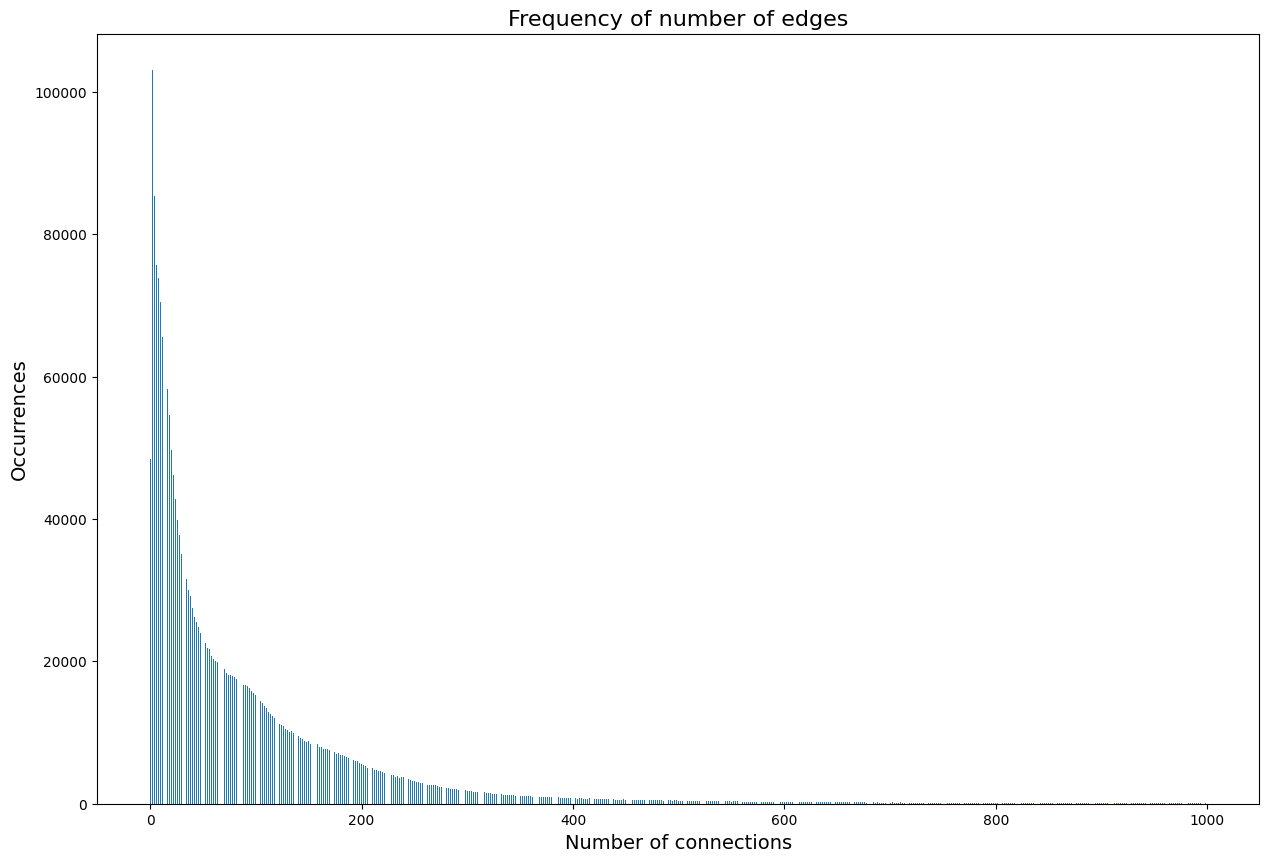

In [ ]:
len(data.edge_index[0])
edge_distribution = torch.bincount(torch.bincount(torch.flatten(data.edge_index))).tolist()[:1000]
edge_range = list(range(0, len(edge_distribution)))[:1000]

print(edge_distribution)
print(edge_range)
# YOUR CODE HERE

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(edge_range, edge_distribution)
#plt.xticks(edge_range)
#ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Number of connections', fontsize=14)
ax.set_ylabel('Occurrences', fontsize=14)
ax.set_title('Frequency of number of edges', fontsize=16)


In [ ]:
print(type(data.x))

<class 'torch.Tensor'>
